In [1]:
# Data Pipelines Guided Lesson

In [2]:
 # se importan librerias

import numpy as np    # numerical python
import pandas as pd   # dataframe
import quandl         # quandl api
quandl.ApiConfig.api_key = "T9Wrh_cyK_Bvuz5TqJao"  # API KEY

import matplotlib.pyplot as plt  # plots
import seaborn as sns

In [3]:
# funcion para recoger los nombres de las compañias (simbolo bursatil)

def get_tickers(path):
    companies=pd.read_csv(path)                                   # lee el archivo csv 
    ticker_list=list(companies['Ticker'])                         # extrae los tickers
    print ('Retrieved', str(len(ticker_list)), 'ticker symbols.') # imprime que se han recogido correctamente
    return ticker_list                                            # devuelve lista de tickers

In [4]:
# funcion para recoger el precio de cada ticker

def get_prices(ticker):
    print ('Retrieving data for', ticker)                 # imprime que se estan recogiendo los datos
    prices=quandl.get('WIKI/' + ticker)['Adj. Close'].reset_index()   # el precio de cierre
    prices['Ticker']=ticker                                           # se escege los ticker
    return prices                                                     # devuelve precios

In [5]:
# datos

data=[]
ticker_list=get_tickers('companies.csv')

for ticker in ticker_list:
    prices = get_prices(ticker)
    data.append(prices)

#print (data)

Retrieved 30 ticker symbols.
Retrieving data for AAPL
Retrieving data for NFLX
Retrieving data for AMZN
Retrieving data for MSFT
Retrieving data for GOOG
Retrieving data for TSLA
Retrieving data for FB
Retrieving data for AAP
Retrieving data for DIS
Retrieving data for NKE
Retrieving data for UA
Retrieving data for BAC
Retrieving data for CCL
Retrieving data for CI
Retrieving data for AAL
Retrieving data for LUV
Retrieving data for WFC
Retrieving data for WMT
Retrieving data for HD
Retrieving data for ORCL
Retrieving data for IBM
Retrieving data for NCLH
Retrieving data for RCL
Retrieving data for TWX
Retrieving data for FOX
Retrieving data for F
Retrieving data for GCI
Retrieving data for XOM
Retrieving data for WWE
Retrieving data for WM


In [6]:
# tratamiento de datos

def concat_pivot(data, rows, columns, values):      # funcion para tabla pivote
    df=pd.concat(data, sort=True)                   # concatena dataframes
    pivot=df.pivot_table(values=values, columns=columns, index=rows)  # pivote
    return pivot                                    # devuelve pivote

In [7]:
# otro pivote con metodo pct_change

def compute_returns(df):      # computa el retorno
    returns=df.pct_change()
    return returns

In [8]:
# analisis

def return_risk_ratio(df, days=30):            # ratio de riesgo
    means=pd.DataFrame(df.tail(days).mean())   # media
    std=pd.DataFrame(df.tail(days).std())      # desviacion estandar
    ratios=pd.concat([means, std], axis=1).reset_index() # se crea dataframe
    ratios.columns=['Company', 'Mean', 'Std']
    ratios['Ratio']=ratios['Mean']/ratios['Std']
    return ratios  

In [9]:
# top10
#top10=ratios.sort_values('Ratio', ascending=False).head(10)

In [10]:
# matriz de correlacion

def corr_matrix(df, days=30):
    corr_matrix=df.tail(days).corr()
    return corr_matrix

#target_list=returns[list(top10['Company'])]
#correlation=corr_matrix(target_list)

In [11]:
# plots

def barchart(df, x, y, length=8, width=14, title=""):    # plot de barras
    df=df.sort_values(x, ascending=False)
    plt.figure(figsize=(width,length))
    chart=sns.barplot(data=df, x=x, y=y)
    plt.title(title + "\n", fontsize=16)
    return chart

#bar_plot=barchart(top10, 'Ratio', 'Company', title='Stock Return vs. Risk Ratios'

In [12]:
def correlation_plot(corr, title=""):           # plot de la matriz de correlacion
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    plt.subplots(figsize=(15, 10))
    cmap = sns.diverging_palette(6, 255, as_cmap=True)
    
    chart = sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5, annot=True, fmt='.2f')
    plt.title(title, fontsize=16)
    return chart

#corr_plot = correlation_plot(correlation, title='Stock Return Correlation')

In [13]:
# se guarda el plot
def save_viz(chart, title):
    fig=chart.get_figure()
    fig.savefig(title + '.png')

In [14]:
# se pone el pipeline junto, las llamadas en funciones

def acquire():        # adquiere los datos
    data=[]
    ticker_list=get_tickers('companies.csv')
    
    for ticker in ticker_list:
        prices=get_prices(ticker)
        data.append(prices)
    return data


 
def wrangle(data):    # procesalos
    pivot=concat_pivot(data, 'Date', 'Ticker', 'Adj. Close')
    returns=compute_returns(pivot)
    return returns




def analyze(returns, days=30):      # analizalos
    ratios=return_risk_ratio(returns, days=days)
    top10=ratios.sort_values('Ratio', ascending=False).head(10)
    target_list=returns[list(top10['Company'])]
    correlation=corr_matrix(target_list)
    return top10, correlation




def report(top10, correlation):    # el report con los plots
    bar_plot = barchart(top10, 'Ratio', 'Company', title='Stock Return vs. Risk Ratios - ' + str(day) + ' Days')
    save_viz(bar_plot, 'Return vs. Risk Top 10 - ' + str(day) + ' Days')
    
    corr_plot = correlation_plot(correlation, title='Stock Return Correlation - ' + str(day) + ' Days')
    save_viz(corr_plot, 'Correlation Plot - ' + str(day) + ' Days')

Retrieved 30 ticker symbols.
Retrieving data for AAPL
Retrieving data for NFLX
Retrieving data for AMZN
Retrieving data for MSFT
Retrieving data for GOOG
Retrieving data for TSLA
Retrieving data for FB
Retrieving data for AAP
Retrieving data for DIS
Retrieving data for NKE
Retrieving data for UA
Retrieving data for BAC
Retrieving data for CCL
Retrieving data for CI
Retrieving data for AAL
Retrieving data for LUV
Retrieving data for WFC
Retrieving data for WMT
Retrieving data for HD
Retrieving data for ORCL
Retrieving data for IBM
Retrieving data for NCLH
Retrieving data for RCL
Retrieving data for TWX
Retrieving data for FOX
Retrieving data for F
Retrieving data for GCI
Retrieving data for XOM
Retrieving data for WWE
Retrieving data for WM


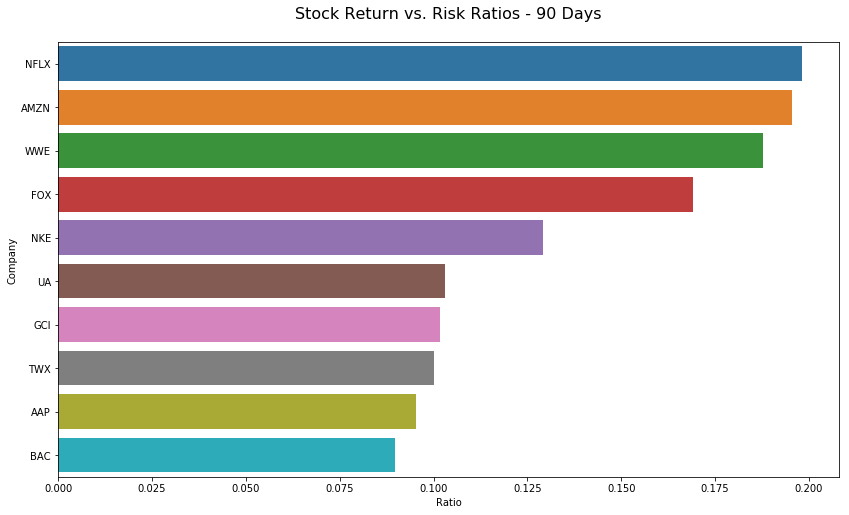

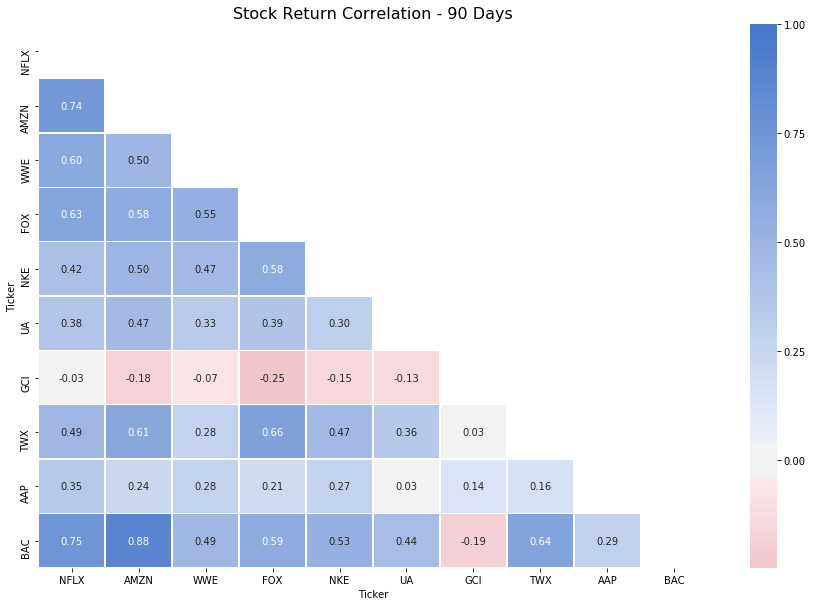

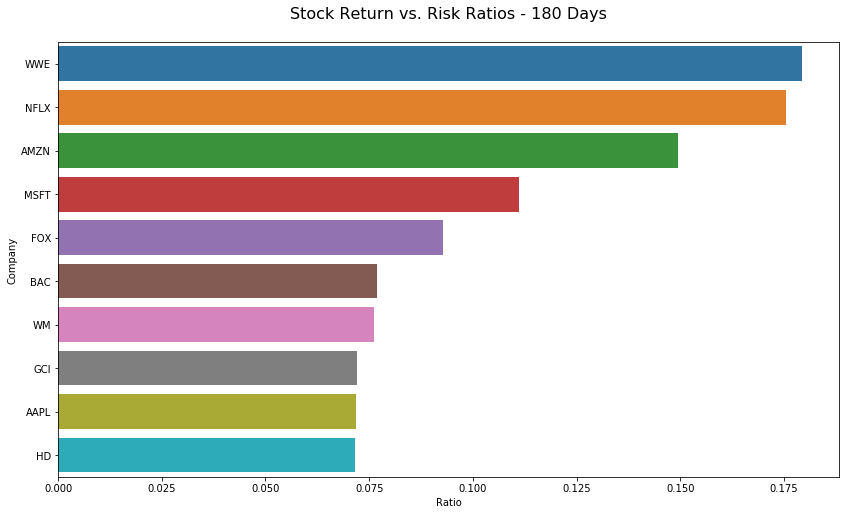

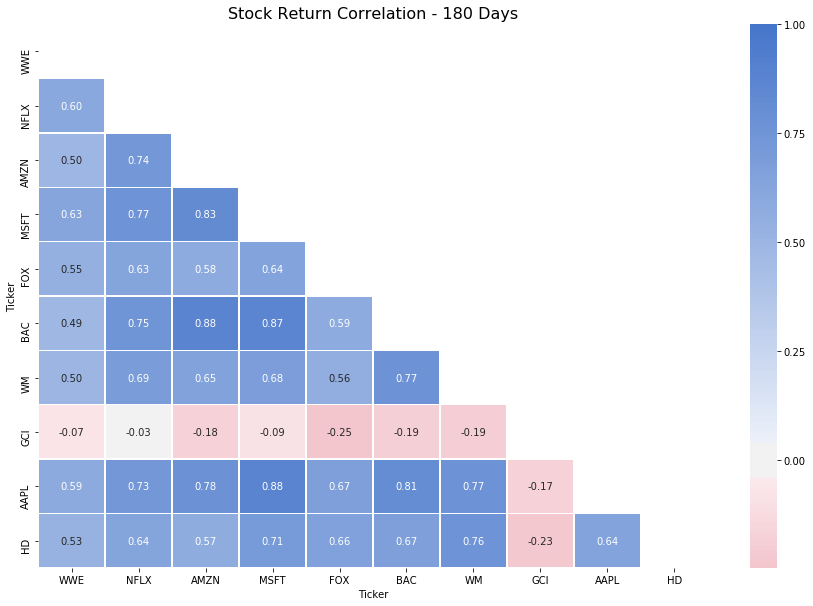

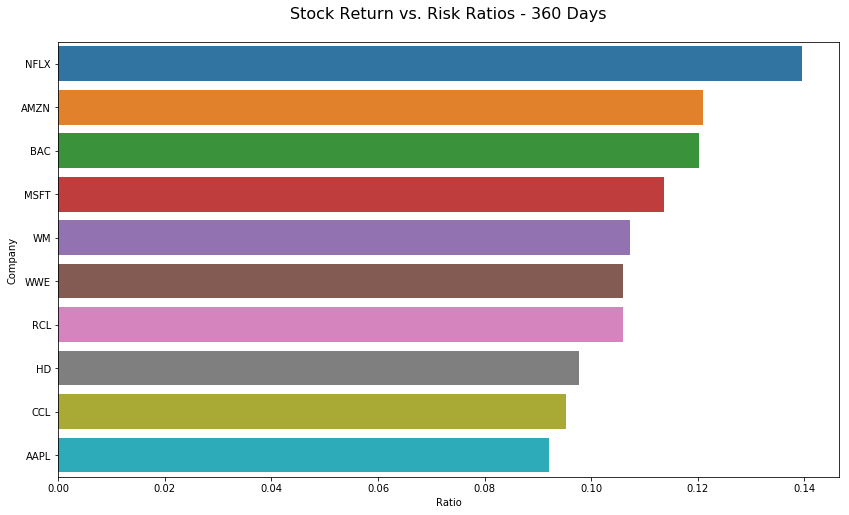

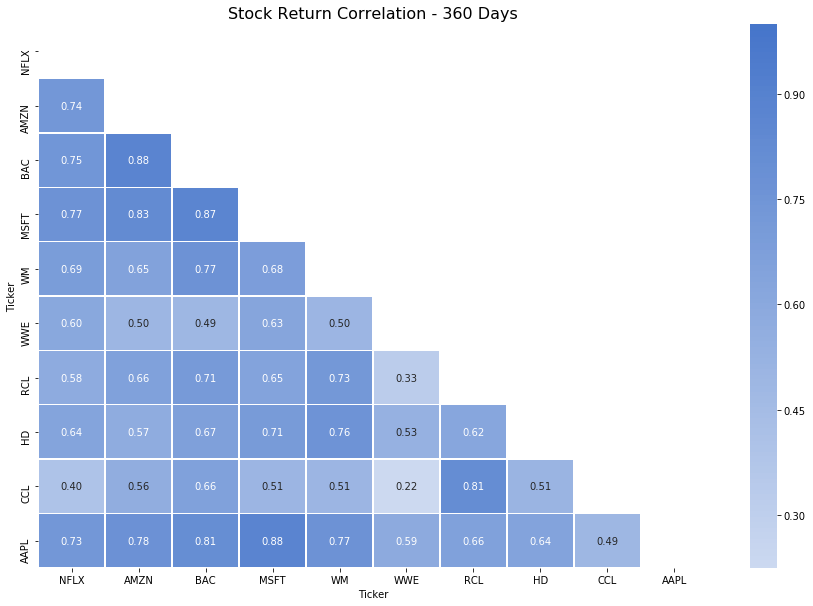

In [15]:
if __name__ == "__main__":
    data=acquire()
    returns=wrangle(data)

    num_days=[90,180,360]

    for day in num_days:
        top10, correlation=analyze(returns, days=day)
        report(top10, correlation)